<a href="https://colab.research.google.com/github/chadwill05/Space-Mission-Analysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.describe

<bound method NDFrame.describe of       Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                            

In [ ]:
print(f'Any Nan Values? {df_data.isna().values.any()}')

Any Nan Values? True


In [ ]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_no_null = df_data.fillna(0)

In [ ]:
df_clean = df_no_null.drop_duplicates()

In [ ]:
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [ ]:
df_clean.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launch_counts = df_clean.groupby('Organisation').size()

In [ ]:
launch_counts_sorted = launch_counts.sort_values(ascending=False)

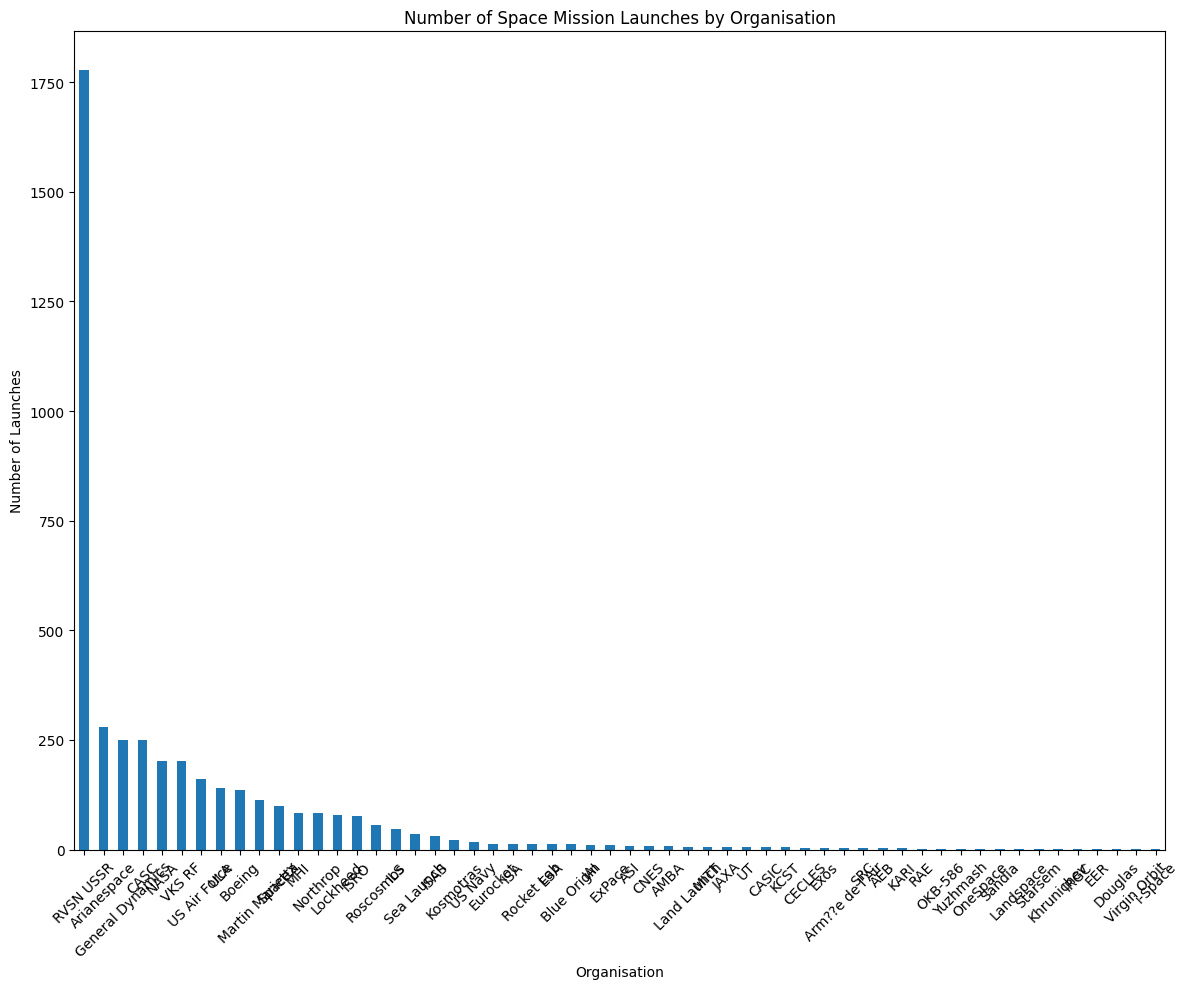

In [ ]:
plt.figure(figsize=(12,10))
launch_counts_sorted.plot(kind='bar')
plt.title('Number of Space Mission Launches by Organisation')
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45) # Rotate the x labels to make them more readable
plt.tight_layout() # Adjust layout to fit the x labels
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
status_counts = df_clean['Rocket_Status'].value_counts()

In [ ]:
print(status_counts)

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status_counts = df_clean['Mission_Status'].value_counts()

In [ ]:
success_count = mission_status_counts.get('Success', 0)
print(f"Number of Successful Missions: {success_count}")

Number of Successful Missions: 3879


In [ ]:
failure_count = mission_status_counts.get('Failure', 0)
print(f"Number of Failed Missions: {failure_count}")

Number of Failed Missions: 339


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

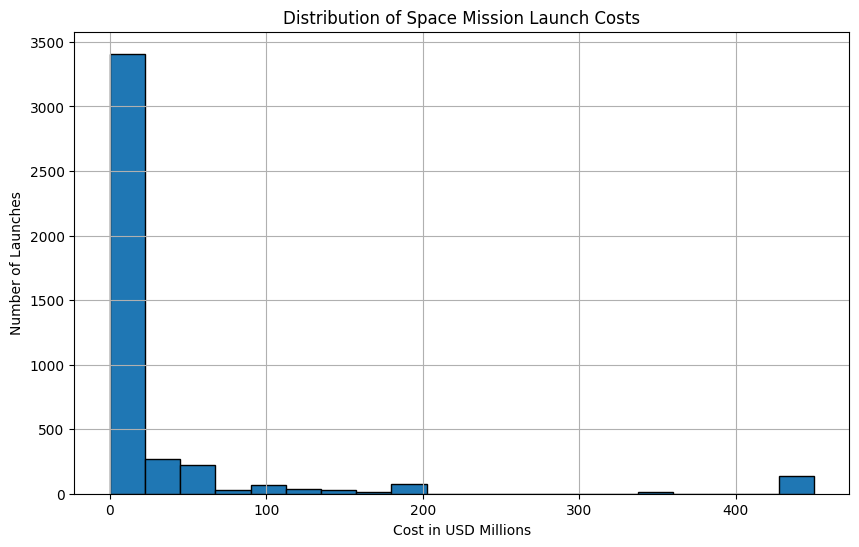

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Price'], bins=20, edgecolor='black')  # Adjust bins as necessary
plt.title('Distribution of Space Mission Launch Costs')
plt.xlabel('Cost in USD Millions')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_clean['Location'] = df_clean['Location'].replace({
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'Spain'  # Assuming Gran Canaria should be Spain instead of USA
})


In [ ]:
def get_alpha3(country):
    try:
        return countries.get(country).alpha3
    except KeyError:
        return None

In [ ]:
df_clean['Country'] = df_clean['Location'].str.split(', ').str[-1].apply(get_alpha3)

In [ ]:
launch_counts = df_clean['Country'].value_counts().reset_index()
launch_counts.columns = ['Country', 'Launches']

In [ ]:
fig = px.choropleth(launch_counts,
                    locations="Country",
                    color="Launches",
                    hover_name="Country",
                    color_continuous_scale='matter')  # or any other color scale
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_failed = df_clean[df_clean['Mission_Status'] == 'Failure']

In [ ]:
failure_counts = df_failed['Country'].value_counts().reset_index()
failure_counts.columns = ['Country', 'Failures']

In [ ]:
fig = px.choropleth(failure_counts,
                    locations="Country",
                    color="Failures",
                    hover_name="Country",
                    color_continuous_scale='matter')  # or any other color scale
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
df_clean['Country'] = df_clean['Location'].str.split(', ').str[-1].apply(get_alpha3)



# Group by country, organization, and mission status
grouped_data = df_clean.groupby(['Country', 'Organisation', 'Mission_Status']).size().reset_index(name='Count')

# Create the sunburst chart
fig = px.sunburst(grouped_data, path=['Country', 'Organisation', 'Mission_Status'], values='Count',
                  color='Count', color_continuous_scale='matter')

# Adjust the layout if needed
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

# Show the plot
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_spent_by_org = df_clean.groupby('Organisation')['Price'].sum().reset_index()


In [ ]:
total_spent_by_org = total_spent_by_org.sort_values(by='Price', ascending=False)

In [ ]:
print(total_spent_by_org)

        Organisation     Price
35              NASA 61,200.00
3        Arianespace 16,345.00
48               ULA 14,798.00
7               CASC  6,340.26
46            SpaceX  5,444.00
36          Northrop  3,930.00
32               MHI  3,532.50
23              ISRO  2,177.00
49      US Air Force  1,550.92
52            VKS RF  1,548.90
19               ILS  1,320.00
6             Boeing  1,241.00
42         Roscosmos  1,187.50
34   Martin Marietta    721.40
28         Kosmotras    638.00
14          Eurockot    543.40
31          Lockheed    280.00
24              JAXA    168.00
41        Rocket Lab     97.50
13               ESA     37.00
15            ExPace     28.30
12               EER     20.00
44            Sandia     15.00
53      Virgin Orbit     12.00
43               SRC      0.00
50           US Navy      0.00
47           Starsem      0.00
40         RVSN USSR      0.00
39               RAE      0.00
38          OneSpace      0.00
37           OKB-586      0.00
51      

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
# Group by 'Organisation' and calculate sum of 'Price' and count of launches
org_stats = df_clean.groupby('Organisation').agg(Total_Spent=('Price', 'sum'), Launch_Count=('Price', 'count'))

# Calculate the average cost per launch
org_stats['Avg_Cost_Per_Launch'] = org_stats['Total_Spent'] / org_stats['Launch_Count']

# Sort the results to identify the organizations with the highest cost per launch
org_stats = org_stats.sort_values(by='Avg_Cost_Per_Launch', ascending=False)

# Display the resulting DataFrame
print(org_stats)

                  Total_Spent  Launch_Count  Avg_Cost_Per_Launch
Organisation                                                    
NASA                61,200.00           190               322.11
ULA                 14,798.00           140               105.70
Arianespace         16,345.00           279                58.58
SpaceX               5,444.00           100                54.44
Northrop             3,930.00            83                47.35
MHI                  3,532.50            84                42.05
Eurockot               543.40            13                41.80
Kosmotras              638.00            22                29.00
ILS                  1,320.00            46                28.70
ISRO                 2,177.00            76                28.64
CASC                 6,340.26           251                25.26
JAXA                   168.00             7                24.00
Roscosmos            1,187.50            55                21.59
EER                     2

# Chart the Number of Launches per Year

In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], utc=True)

#convert them to time zone naive
df_clean['Date'] = df_clean['Date'].dt.tz_convert(None)

# Extract year from 'Date' column
df_clean['Year'] = df_clean['Date'].dt.year

# Count the number of launches per year
launches_per_year = df_clean.groupby('Year').size()


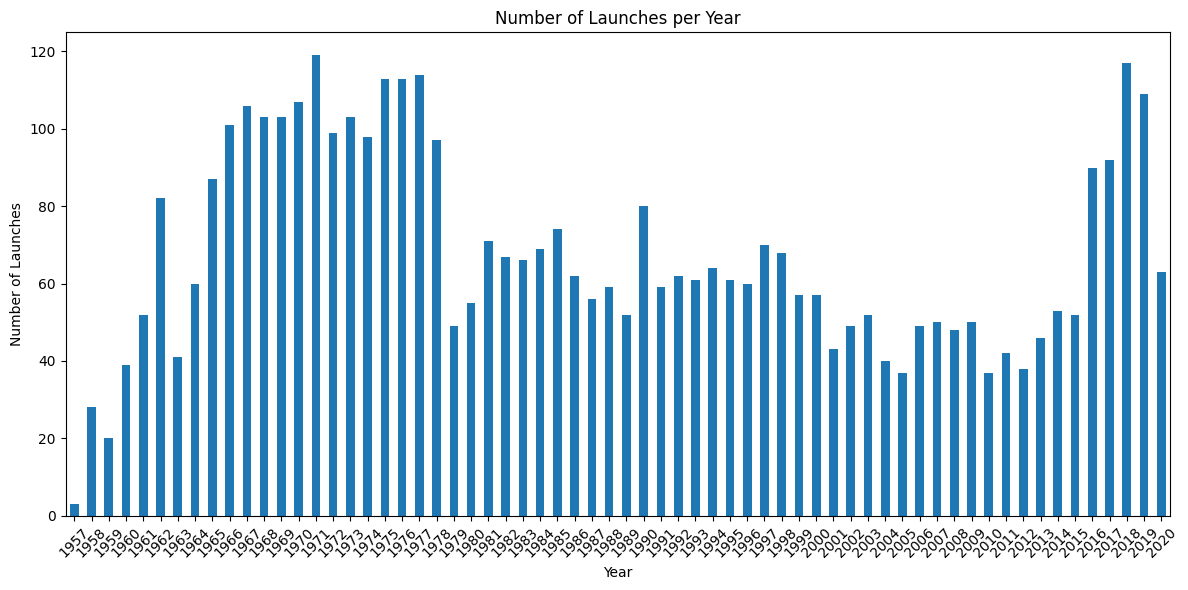

In [ ]:
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='bar')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_clean['YearMonth'] = df_clean['Date'].dt.to_period('M')


# Count the number of launches per month
launches_per_month = df_clean.groupby('YearMonth').size()

# Find the month with the highest number of launches
max_launches_month = launches_per_month.idxmax()
max_launches = launches_per_month.max()
print(f"The month with the highest number of launches is {max_launches_month} with {max_launches} launches.")

# Calculate the rolling average (let's use a 12-month window for the rolling average)
rolling_avg = launches_per_month.rolling(window=12).mean()


The month with the highest number of launches is 1971-12 with 18 launches.


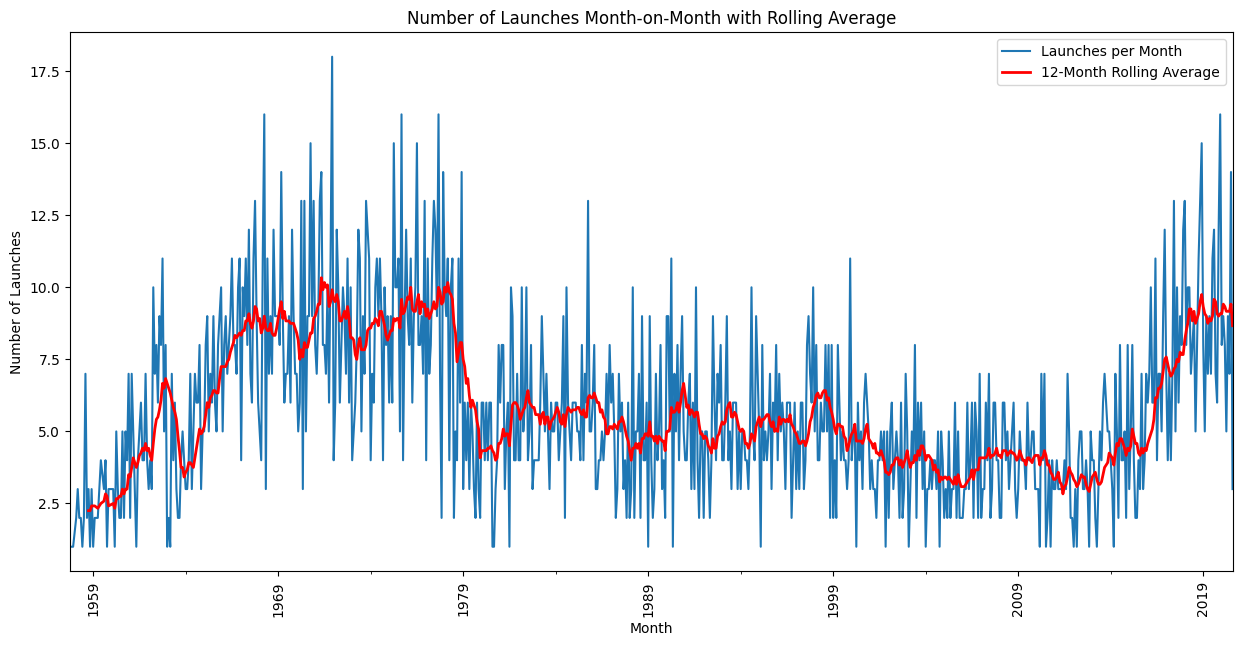

In [ ]:
plt.figure(figsize=(15, 7))
launches_per_month.plot(label='Launches per Month')
rolling_avg.plot(color='red', linewidth=2, label='12-Month Rolling Average')
plt.title('Number of Launches Month-on-Month with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

# Extract the month from 'Date' column
df_clean['Month'] = df_clean['Date'].dt.month

launches_per_month = df_clean.groupby('Month').size()

# Sort the count for better visualization and interpretation
sorted_launches = launches_per_month.sort_values()

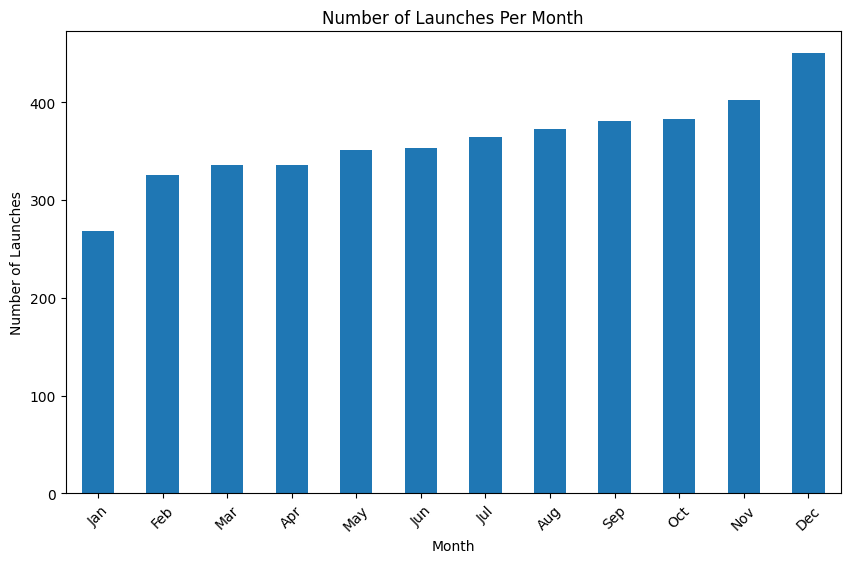

In [ ]:
plt.figure(figsize=(10, 6))
sorted_launches.plot(kind='bar')
plt.title('Number of Launches Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
df = df_clean.dropna(subset=['Price'])

average_price_per_year = df_clean.groupby('Year')['Price'].mean()

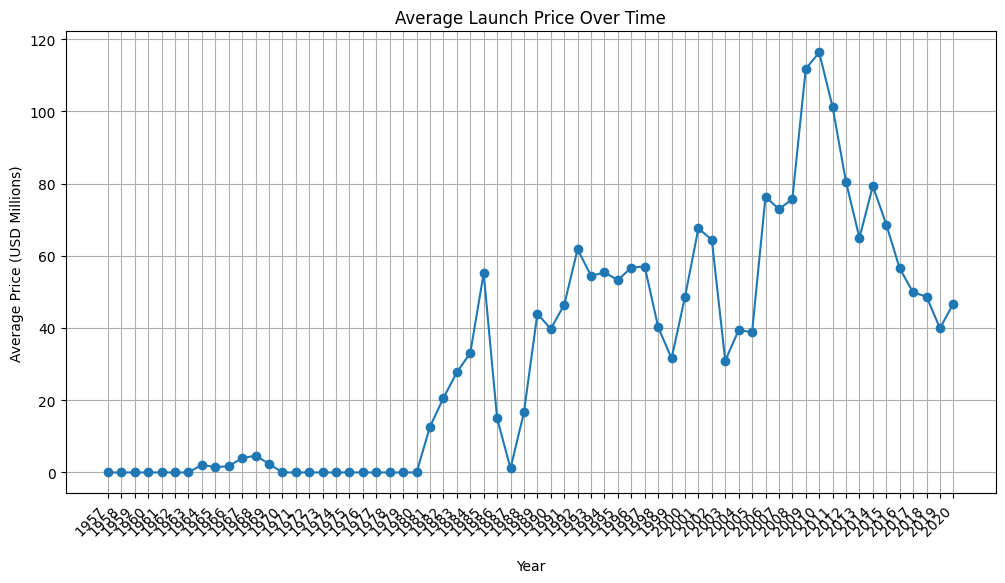

In [ ]:
plt.figure(figsize=(12, 6))
average_price_per_year.plot(kind='line', marker='o')
plt.title('Average Launch Price Over Time')
plt.xlabel('Year', labelpad=15)
plt.ylabel('Average Price (USD Millions)')
plt.grid(True)
plt.xticks(average_price_per_year.index, rotation=45, ha='right')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:

df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Year'] = df_clean['Date'].dt.year


top_10_orgs = df_clean['Organisation'].value_counts().head(10).index


top_orgs_df = df_clean[df_clean['Organisation'].isin(top_10_orgs)]


launches_by_year_org = top_orgs_df.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)


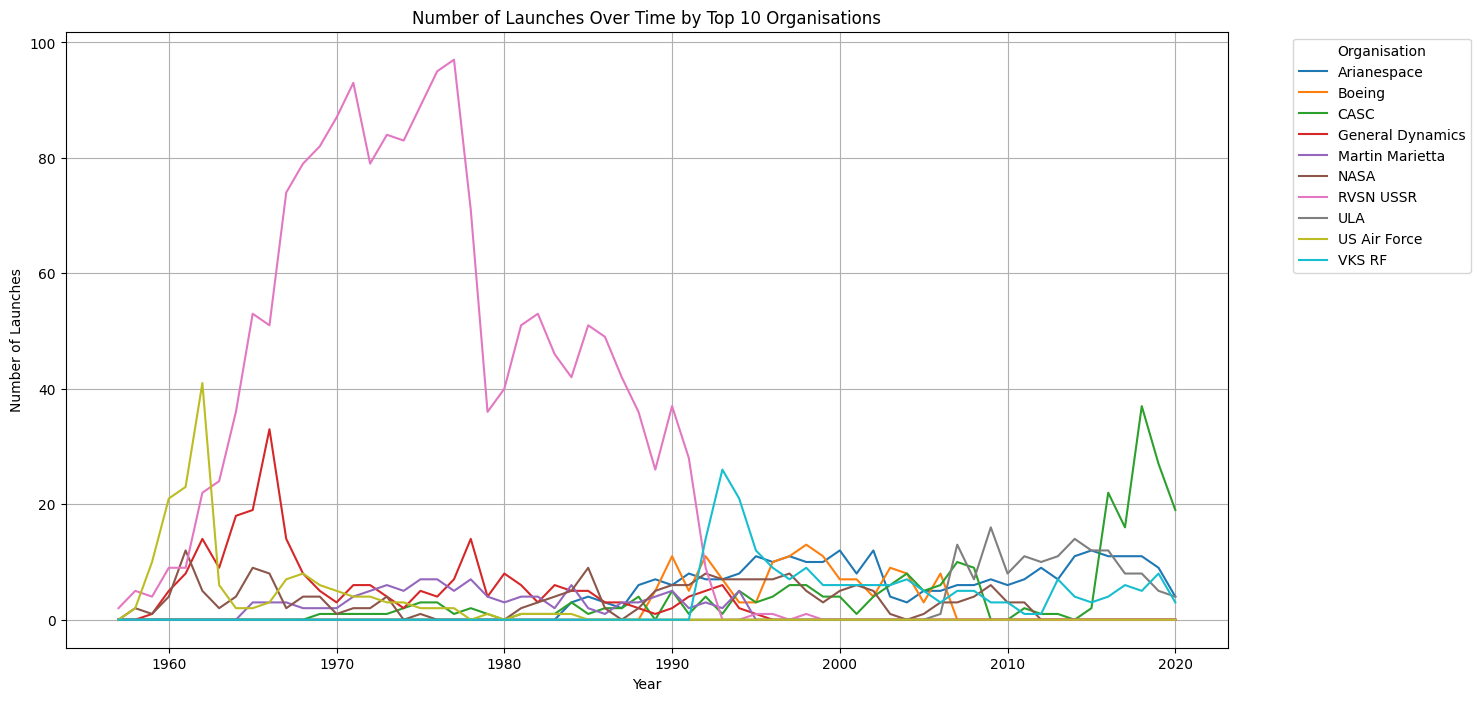

In [ ]:
plt.figure(figsize=(15, 8))
for organisation in launches_by_year_org.columns:
    plt.plot(launches_by_year_org.index, launches_by_year_org[organisation], marker='', label=organisation)

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Year'] = df_clean['Date'].dt.year

# Filter for launches by the USA and USSR until the end of 1991
cold_war_df = df_clean[((df_clean['Organisation'] == 'USA') | (df_clean['Organisation'] == 'USSR')) & (df_clean['Year'] <= 1991)]

# Group by year and organization, then count the number of launches
launches_by_year_country = cold_war_df.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)


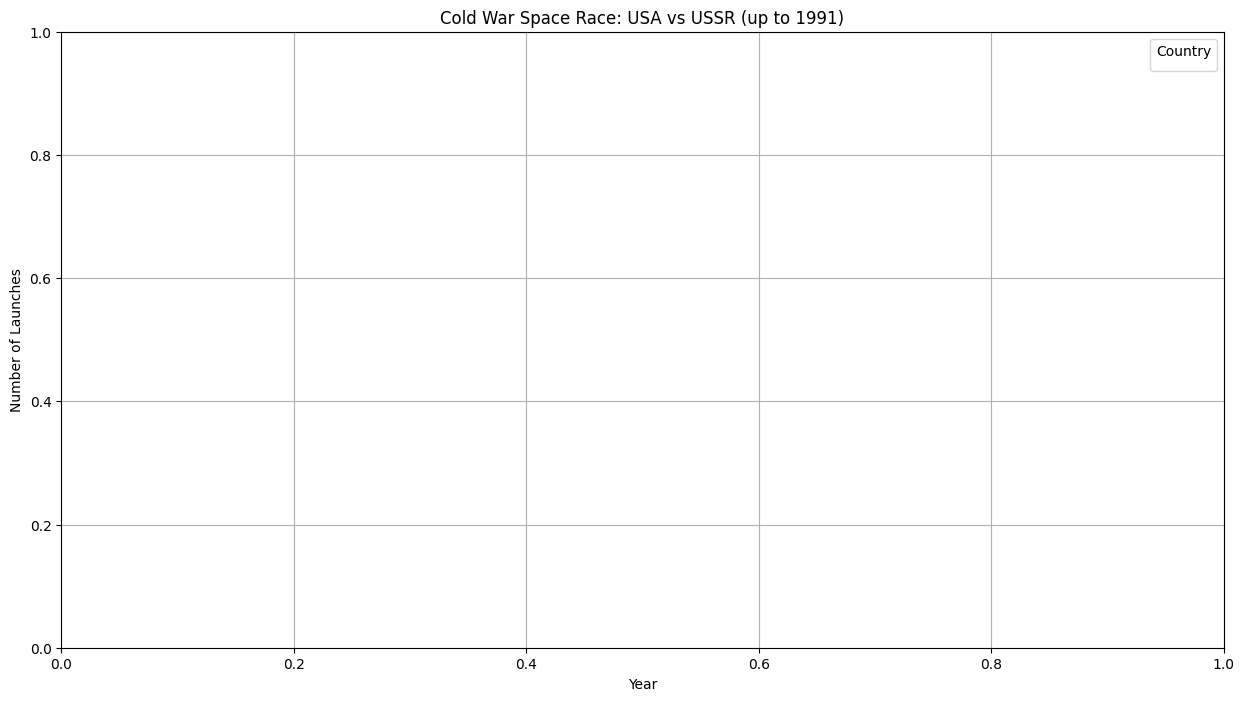

In [ ]:
plt.figure(figsize=(15, 8))
for country in launches_by_year_country.columns:
    plt.plot(launches_by_year_country.index, launches_by_year_country[country], marker='', label=country)

plt.title('Cold War Space Race: USA vs USSR (up to 1991)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Country')
plt.grid(True)
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
def categorize_launch(row):
    if 'USA' in row['Location'] or row['Organisation'] == 'NASA':
        return 'USA'
    elif 'USSR' in row['Location'] or 'Kazakhstan' in row['Location'] or row['Organisation'] in ['Roscosmos', 'Soviet Union']:
        return 'USSR'
    else:
        return 'Other'

In [ ]:
df_clean['Category'] = df_clean.apply(categorize_launch, axis=1)

# Count the number of launches in each category
launch_counts = df_clean['Category'].value_counts()

# Create a pie chart
fig = px.pie(launch_counts, values=launch_counts.values, names=launch_counts.index, title='Total Number of Launches: USSR vs USA')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [92]:
df['Superpower'] = df_clean.apply(categorize_launch, axis=1)

# Filter out 'Other' category
df_filtered = df[df['Superpower'] != 'Other']

# Group by year and superpower, then count the number of launches
launches_by_year = df_filtered.groupby(['Year', 'Superpower']).size().unstack(fill_value=0)

<ipython-input-92-42318ec3b874>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1500x800 with 0 Axes>

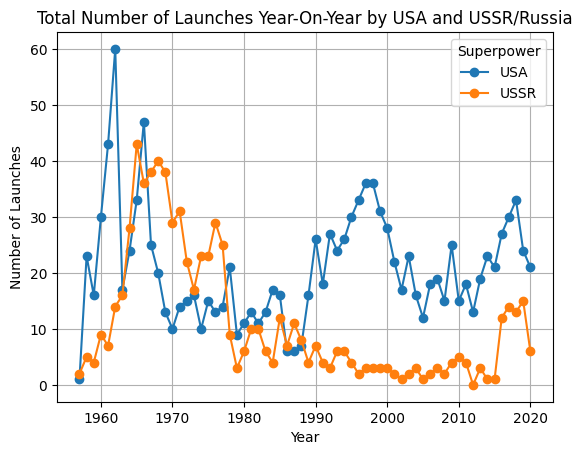

In [93]:
plt.figure(figsize=(15, 8))
launches_by_year.plot(kind='line', marker='o')
plt.title('Total Number of Launches Year-On-Year by USA and USSR/Russia')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Superpower')
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [95]:
df_failures = df_clean[df_clean['Mission_Status'] == 'Failure']

# Group by year and count the number of failures
failures_per_year = df_failures.groupby('Year').size()

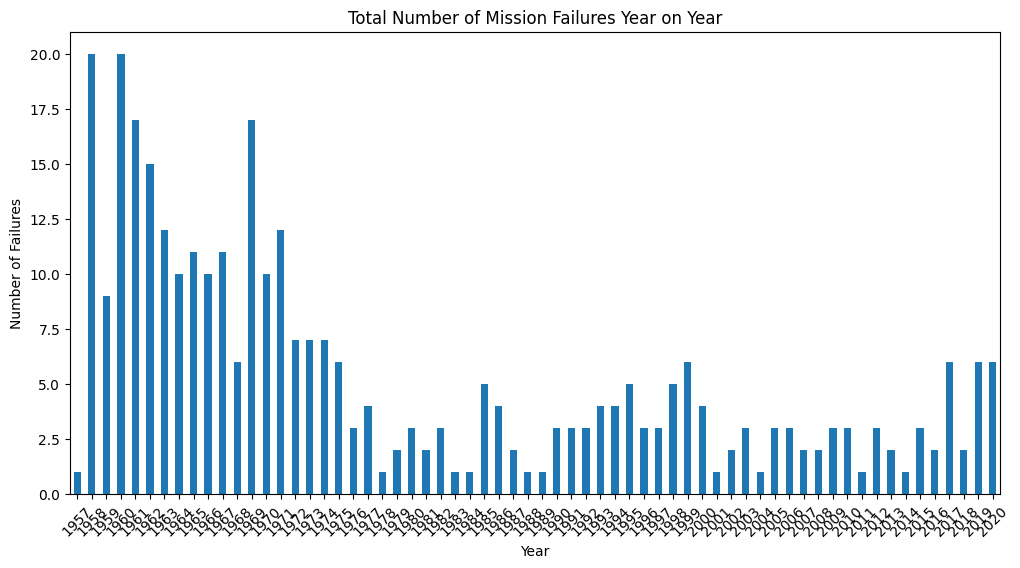

In [96]:
plt.figure(figsize=(12, 6))
failures_per_year.plot(kind='bar')
plt.title('Total Number of Mission Failures Year on Year')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.xticks(rotation=45)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [97]:
yearly_data = df_clean.groupby('Year').agg(
    Total_Launches=pd.NamedAgg(column="Mission_Status", aggfunc="count"),
    Failures=pd.NamedAgg(column="Mission_Status", aggfunc=lambda x: (x == 'Failure').sum())
)

# Calculate the percentage of failures
yearly_data['Failure_Percentage'] = (yearly_data['Failures'] / yearly_data['Total_Launches']) * 100


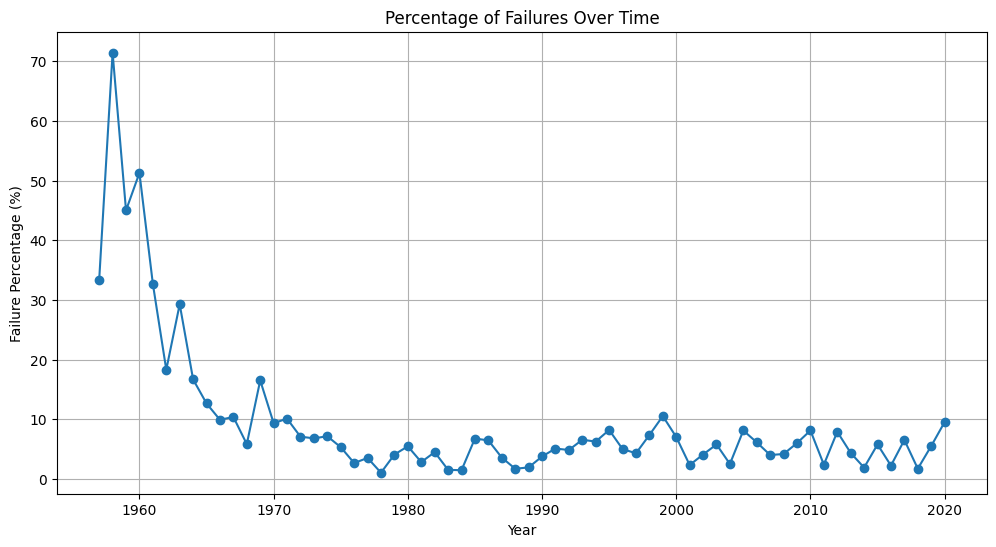

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['Failure_Percentage'], marker='o')
plt.title('Percentage of Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Failure Percentage (%)')
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [99]:
df_clean['Country'] = df_clean['Location'].str.extract(r'(\b[A-Z]{3}\b)')  # Adjust regex as needed

# Filter data up to and including 2020
df_up_to_2020 = df_clean[df_clean['Year'] <= 2020]

# Group by year and country, then count the number of launches
launches_per_year_country = df_up_to_2020.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Determine the leading country each year
leading_country_each_year = launches_per_year_country.idxmax(axis=1)
print("Leading Country Each Year (Total Launches):")
print(leading_country_each_year)

Leading Country Each Year (Total Launches):
Year
1957    AFS
1958    AFS
1959    SLC
1960    SLC
1961    SLC
       ... 
2016    SLC
2017    SLC
2018    SLC
2019    SLC
2020    SLC
Length: 64, dtype: object


In [100]:
df_success = df_up_to_2020[df_up_to_2020['Mission_Status'] == 'Success']

# Group by year and country, then count the number of successful launches
success_launches_per_year_country = df_success.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Determine the leading country each year for successful launches
leading_country_each_year_success = success_launches_per_year_country.idxmax(axis=1)
print("\nLeading Country Each Year (Successful Launches):")
print(leading_country_each_year_success)


Leading Country Each Year (Successful Launches):
Year
1958    AFS
1959    SLC
1960    SLC
1961    SLC
1962    SLC
       ... 
2016    SLC
2017    SLC
2018    SLC
2019    SLC
2020    SLC
Length: 63, dtype: object


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [101]:
launches_per_year_org = df_clean.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Determine the leading organization each year
leading_org_each_year = launches_per_year_org.idxmax(axis=1)

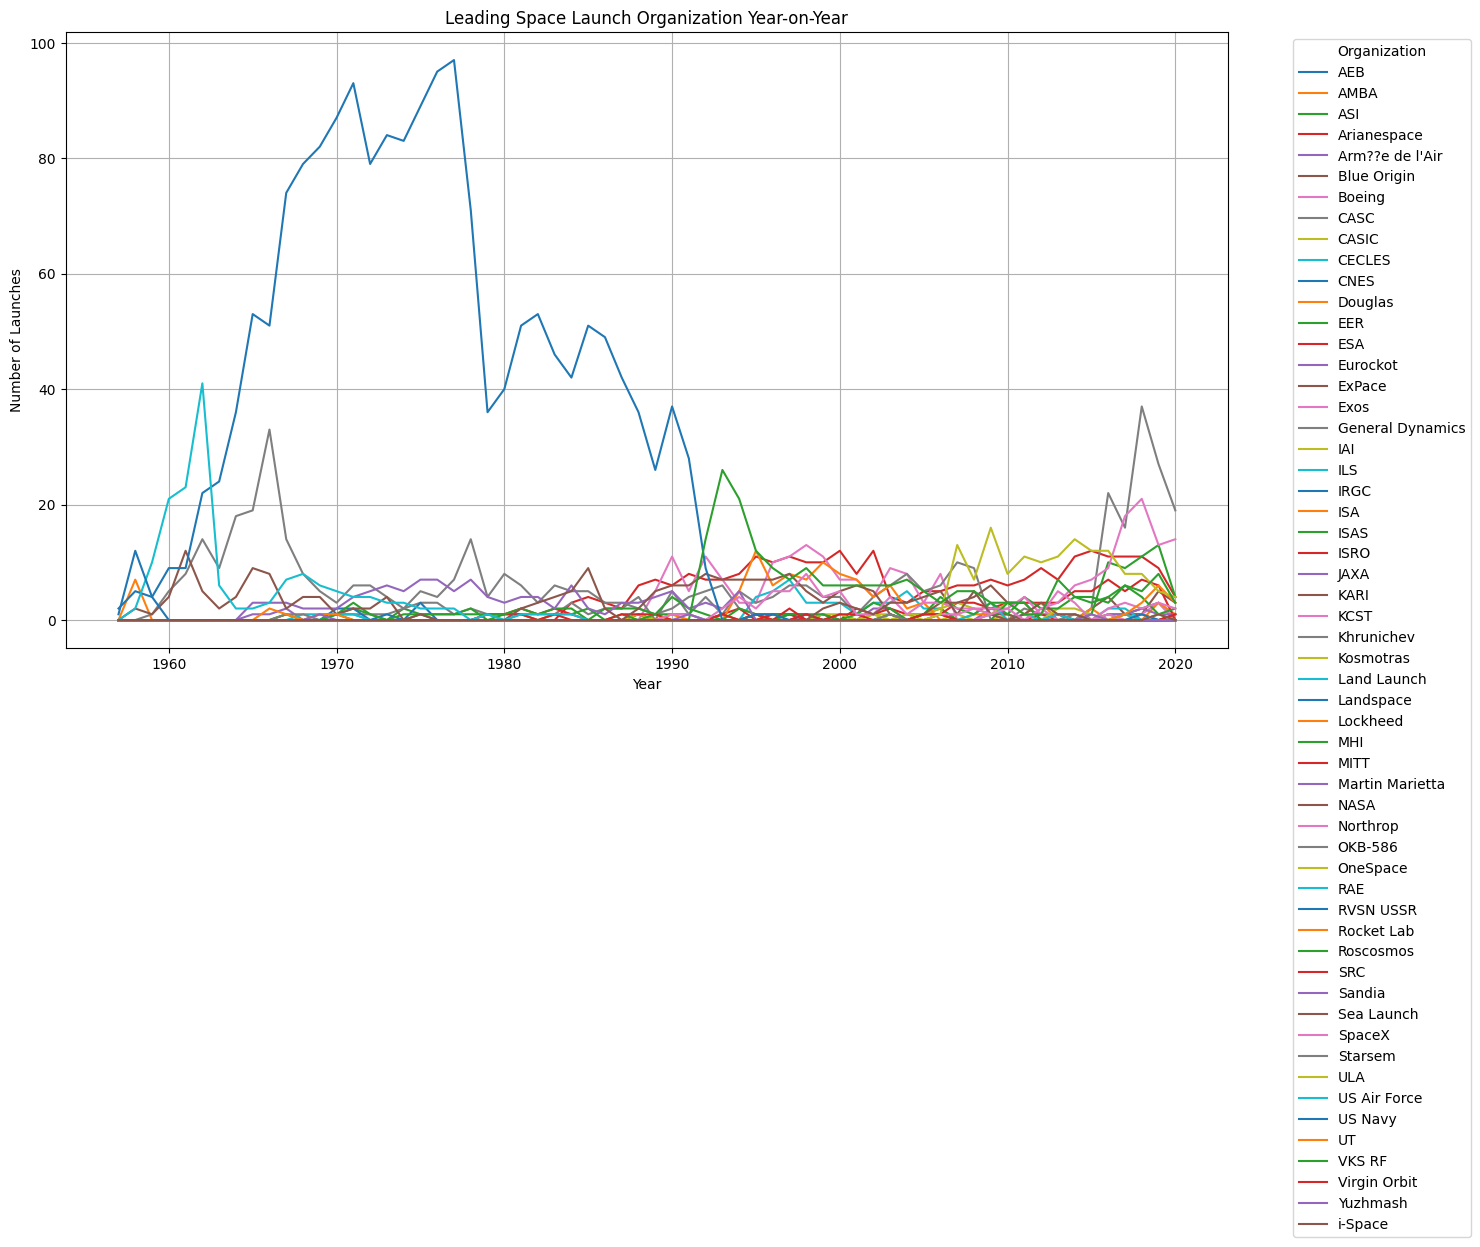

In [102]:
plt.figure(figsize=(15, 8))
for organisation in launches_per_year_org.columns:
    plt.plot(launches_per_year_org.index, launches_per_year_org[organisation], label=organisation)

plt.title('Leading Space Launch Organization Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [103]:
dominant_70s_80s = leading_org_each_year[(leading_org_each_year.index >= 1970) & (leading_org_each_year.index < 1990)].value_counts().idxmax()

# Dominant organization in 2018, 2019, and 2020
dominant_recent_years = leading_org_each_year.loc[2018:2020].value_counts().idxmax()

print(f"Dominant organization in the 1970s and 1980s: {dominant_70s_80s}")
print(f"Dominant organization in 2018, 2019, and 2020: {dominant_recent_years}")


Dominant organization in the 1970s and 1980s: RVSN USSR
Dominant organization in 2018, 2019, and 2020: CASC
